In [1]:
from deep_Q_learning import train, self_train
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from scipy.signal import savgol_filter


## Question 11 
Plot average reward and average training loss for every 250 games during training. Does the loss decrease? Does the agent learn to play Tic Tac Toe?

In [2]:
_, losses, rewards, _, _ = train(nb_epochs=20000)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [12:31<00:00, 26.62it/s]

Learning finished after 751.19s
Played a total of 20000 games


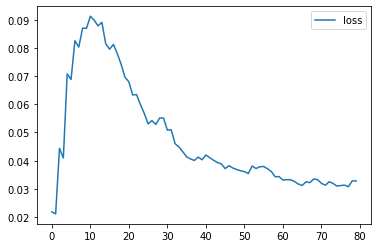

In [3]:
plt.plot(losses, label="loss")
plt.legend()
plt.show()

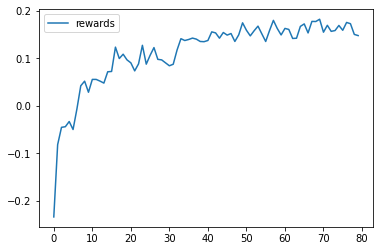

In [4]:
plt.plot(rewards, label="rewards")
plt.legend()
plt.show()

The loss first increases then decreases. Agent can learn to play since the rewards increase over time

## Question 12
Repeat the training but without the replay buffer and with a batch size of 1: At every step, update the network by using only the latest transition. What do you observe?

In [5]:
_, losses, rewards, _, _ = train(buffer_size=1, batch_size=1, nb_epochs=20000)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [11:50<00:00, 28.14it/s]

Learning finished after 710.77s
Played a total of 20000 games


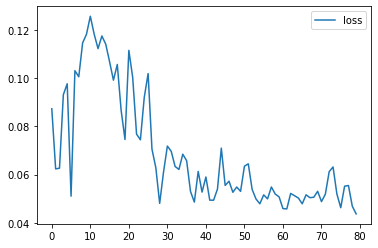

In [6]:
plt.plot(losses, label="loss")
plt.legend()
plt.show()

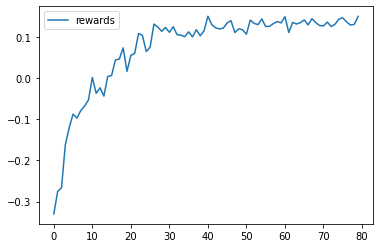

In [7]:
plt.plot(rewards, label="rewards")
plt.legend()
plt.show()

The loss is more fluctuated and the rewards are smaller

Instead of fixing eps, use eps(n) in Equation 1. For different values of n\*,  run your DQN against Opt(0.5) for 20000 games – switch the 1st player after every game. Choose several values of n* from a reasonably wide interval between 1 to 40’000 – particularly, include n* = 1

## Question 13 
After every 250 games during training, compute the ‘test’ Mopt and Mrand for your agents. Plot Mopt and Mrand over time. Does decreasing eps help training compared to having a fixed ? What is the effect of n* ?

In [31]:
result = {}
for eps_agent in range(1,10):
    eps_agent = eps_agent/10
    _, _, _, Mrands_fix, Mopts_fix = train(eps_agent=eps_agent, nb_epochs=20000)
    result[eps_agent] = (Mrands_fix, Mopts_fix)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [07:13<00:00, 46.18it/s]


Learning finished after 433.09s
Played a total of 20000 games


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [10:48<00:00, 30.85it/s]


Learning finished after 648.35s
Played a total of 20000 games


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [12:04<00:00, 27.61it/s]


Learning finished after 724.44s
Played a total of 20000 games


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [11:00<00:00, 30.29it/s]


Learning finished after 660.30s
Played a total of 20000 games


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [09:40<00:00, 34.48it/s]


Learning finished after 580.11s
Played a total of 20000 games


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [11:14<00:00, 29.65it/s]


Learning finished after 674.50s
Played a total of 20000 games


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [10:52<00:00, 30.67it/s]


Learning finished after 652.13s
Played a total of 20000 games


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [09:10<00:00, 36.30it/s]


Learning finished after 550.96s
Played a total of 20000 games


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [09:19<00:00, 35.76it/s]

Learning finished after 559.24s
Played a total of 20000 games


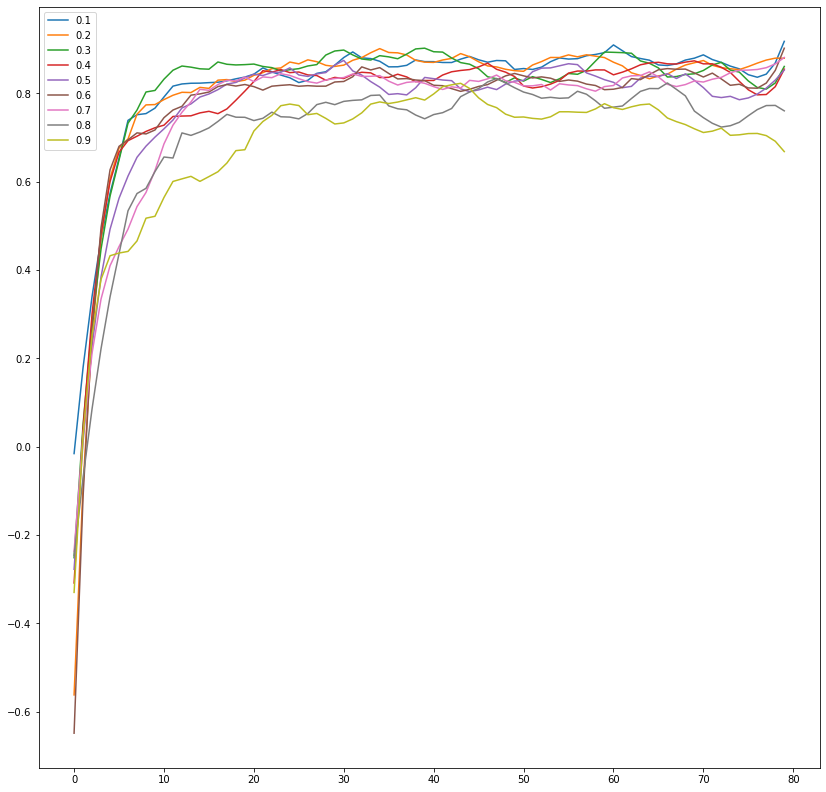

In [34]:
plt.figure(figsize=(14,14))
for eps_agent in range(1,10):
    eps_agent = eps_agent/10
    plt.plot( savgol_filter(result[eps_agent][0], 11, 3), label=str(eps_agent))
#     plt.plot( result[eps_agent][0], label=str(eps_agent))

plt.legend()
plt.show()

In [9]:
Mrands, Mopts = [], []
for max_epoch in [1, 10, 100, 1000, 5000, 10000, 20000, 40000, 100000]:
    _, _, _, Mrand, Mopt = train(decay_eps=True, max_epoch= max_epoch, nb_epochs=20000)
    Mrands.append(Mrand)
    Mopts.append(Mopt)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [12:22<00:00, 26.95it/s]


Learning finished after 742.03s
Played a total of 20000 games


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [12:10<00:00, 27.39it/s]


Learning finished after 730.13s
Played a total of 20000 games


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [12:08<00:00, 27.45it/s]


Learning finished after 728.53s
Played a total of 20000 games


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [12:12<00:00, 27.32it/s]


Learning finished after 732.02s
Played a total of 20000 games


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [12:14<00:00, 27.22it/s]


Learning finished after 734.82s
Played a total of 20000 games


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [12:00<00:00, 27.76it/s]


Learning finished after 720.58s
Played a total of 20000 games


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [11:44<00:00, 28.39it/s]


Learning finished after 704.55s
Played a total of 20000 games


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [11:19<00:00, 29.45it/s]


Learning finished after 679.23s
Played a total of 20000 games


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [10:58<00:00, 30.38it/s]

Learning finished after 658.39s
Played a total of 20000 games


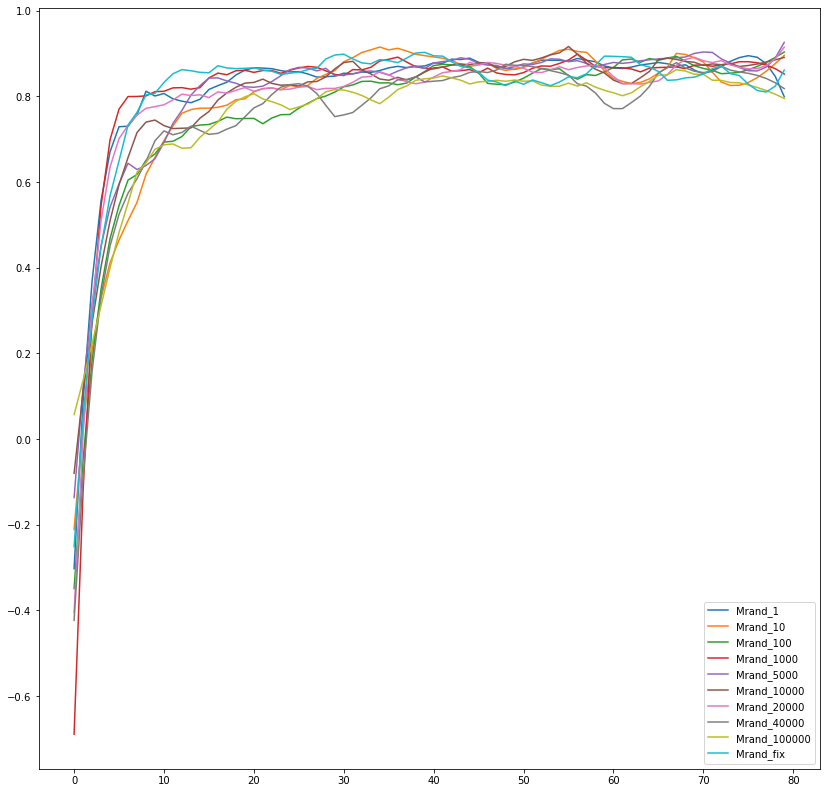

In [36]:
plt.figure(figsize=(14,14))
for Mrand, Mopt, n in zip(Mrands, Mopts, [1, 10, 100, 1000, 5000, 10000, 20000, 40000, 100000]):
    plt.plot( savgol_filter(Mrand, 11, 3), label="Mrand_"+str(n))
#     plt.plot(Mopt, label="Mopt_"+str(n))
plt.plot( savgol_filter(result[0.3][0], 11, 3), label="Mrand_fix")
# plt.plot(Mopts_fix, label="Mopt_fix")
plt.legend()
plt.show()

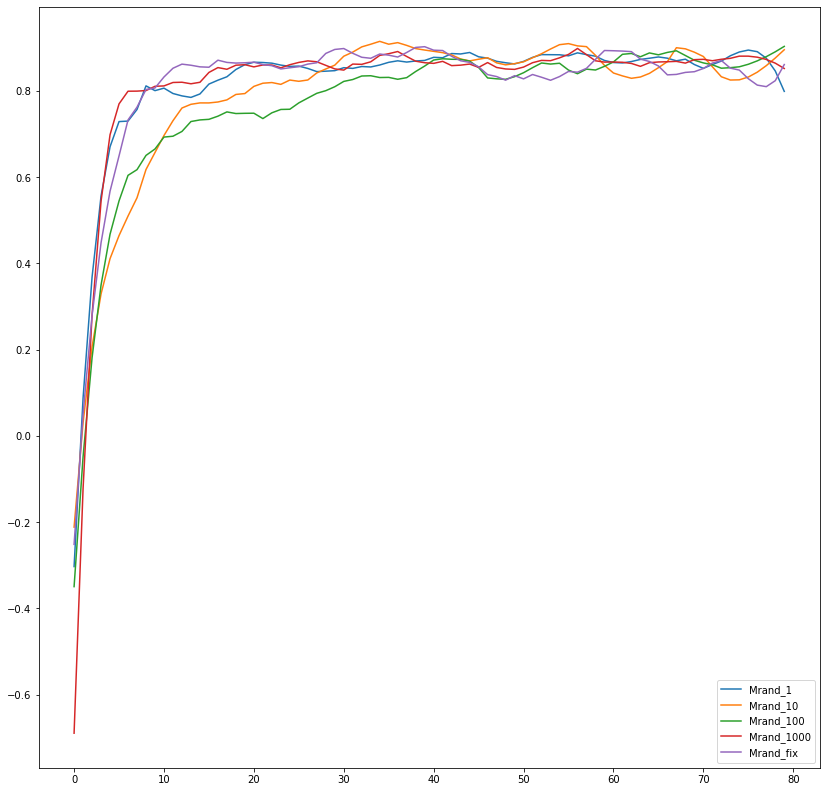

In [37]:
plt.figure(figsize=(14,14))
for Mrand, Mopt, n in zip(Mrands, Mopts, [1, 10, 100, 1000, 5000, 10000, 20000, 40000, 100000]):
    if n not in [1,10,100,1000]:
        continue
    plt.plot( savgol_filter(Mrand, 11, 3), label="Mrand_"+str(n))
#     plt.plot(Mopt, label="Mopt_"+str(n))
plt.plot( savgol_filter(result[0.3][0], 11, 3), label="Mrand_fix")
# plt.plot(Mopts_fix, label="Mopt_fix")
plt.legend()
plt.show()

Choose the best value of n* that you found. Run DQN against Opt(eps_opt) for different values of eps_opt for 20000 games – switch the 1st player after every game. Choose several values of eps_opt from a reasonably wide interval between 0 to 1 – particularly, include eps_opt = 0.
## Question 14
After every 250 games during training, compute the ‘test’ Mopt and Mrand for your agents for each value of eps_opt. Plot Mopt and Mrand over time. What do you observe? How can you explain it?

In [38]:
best_max_epoch=1000

In [39]:
eps_opt_to_metrics= {}
for eps_opt in range(1,10):
    eps_opt = eps_opt/10
    _, _, _, Mrand, Mopt = train(eps_opt=eps_opt, decay_eps=True, max_epoch= best_max_epoch, nb_epochs=20000)
    eps_opt_to_metrics[eps_opt] = (Mrand, Mopt)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [10:02<00:00, 33.17it/s]


Learning finished after 602.94s
Played a total of 20000 games


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [09:43<00:00, 34.29it/s]


Learning finished after 583.32s
Played a total of 20000 games


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [09:34<00:00, 34.82it/s]


Learning finished after 574.43s
Played a total of 20000 games


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [09:11<00:00, 36.29it/s]


Learning finished after 551.12s
Played a total of 20000 games


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [08:58<00:00, 37.16it/s]


Learning finished after 538.17s
Played a total of 20000 games


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [08:47<00:00, 37.91it/s]


Learning finished after 527.55s
Played a total of 20000 games


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [08:53<00:00, 37.48it/s]


Learning finished after 533.67s
Played a total of 20000 games


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [09:51<00:00, 33.82it/s]


Learning finished after 591.40s
Played a total of 20000 games


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [08:06<00:00, 41.07it/s]

Learning finished after 486.98s
Played a total of 20000 games


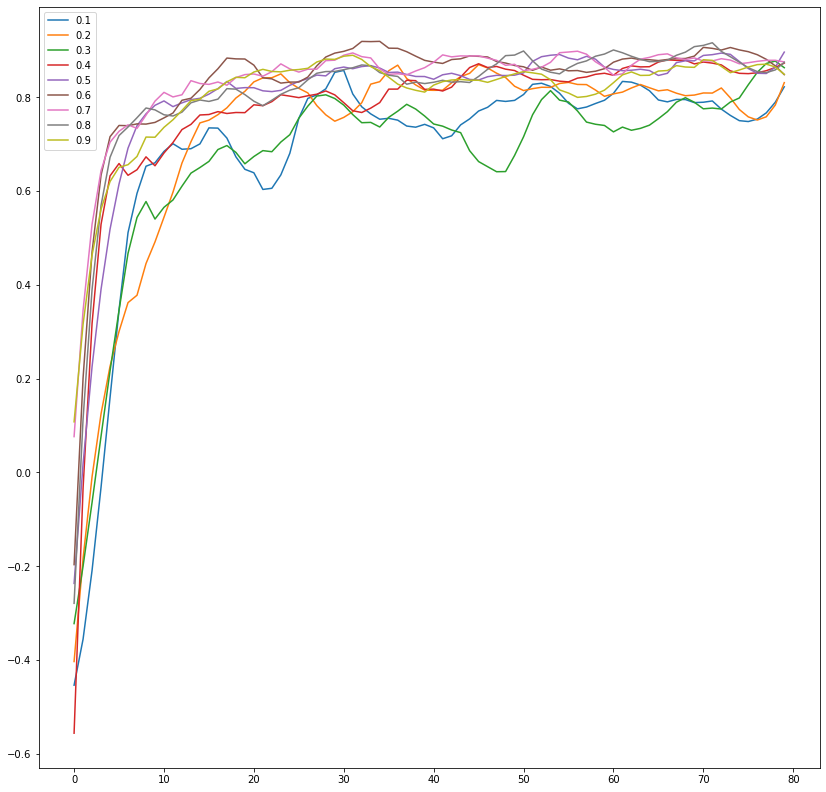

In [41]:
plt.figure(figsize=(14,14))
for eps, (Mrand, Mopt) in eps_opt_to_metrics.items():
    plt.plot( savgol_filter(Mrand, 11, 3), label=str(eps))

plt.legend()
plt.show()

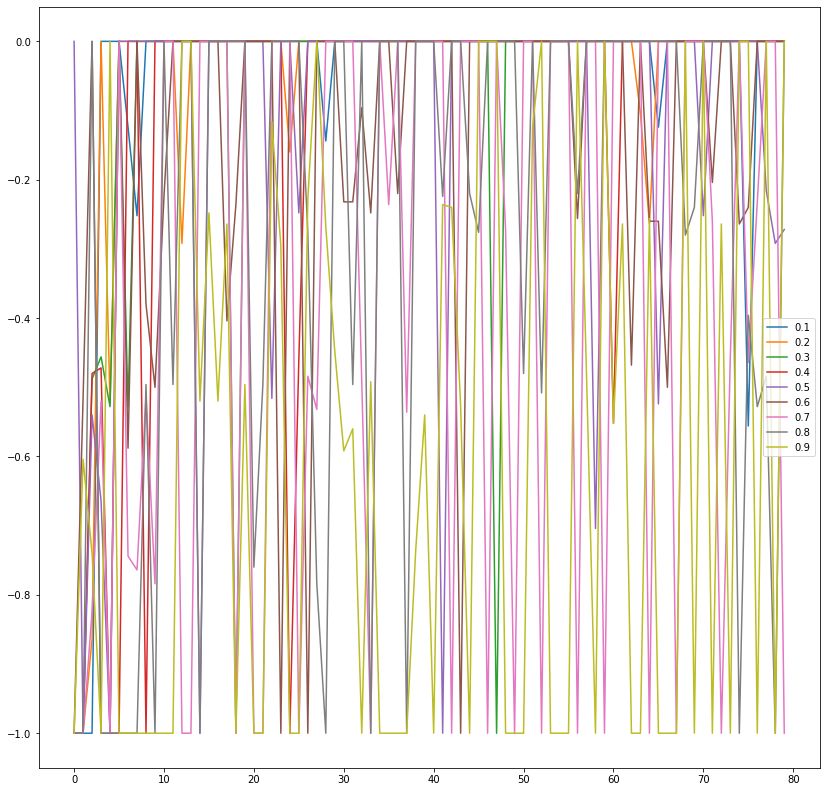

In [42]:
plt.figure(figsize=(14,14))
for eps, (Mrand, Mopt) in eps_opt_to_metrics.items():
    plt.plot( Mopt, label=str(eps))

plt.legend()
plt.show()

## Question 15
What are the highest values of Mopt and Mrand that you could achieve after playing 20000 games?

In [44]:
max(((k,v[0][-1]) for k,v in eps_opt_to_metrics.items()), key=lambda x: x[1]) # Mrand

(0.5, 0.904)

In [45]:
max(((k,v[1][-1]) for k,v in eps_opt_to_metrics.items()), key=lambda x: x[1]) #Mopt

(0.1, 0.0)

## Question 16
After every 250 games during training, compute the ‘test’ Mopt and Mrand for different values of eps ∈\[0, 1). Plot Mopt and Mrand over time. Does the agent learn to play Tic Tac Toe? What is the effect of eps?

In [46]:
from deep_Q_learning import train, self_train


In [47]:
self_eps_agent_to_metrics= {}
for eps_agent in range(1,10):
    eps_agent = eps_agent/10
    self_eps_agent_to_metrics[eps_agent] = self_train(eps_agent=eps_agent, decay_eps=False, nb_epochs=20000)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [09:13<00:00, 36.14it/s]


Learning finished after 553.45s
Played a total of 20000 games


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [12:42<00:00, 26.23it/s]


Learning finished after 762.47s
Played a total of 20000 games


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [15:46<00:00, 21.13it/s]


Learning finished after 946.66s
Played a total of 20000 games


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [11:02<00:00, 30.21it/s]


Learning finished after 662.02s
Played a total of 20000 games


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [10:51<00:00, 30.71it/s]


Learning finished after 651.33s
Played a total of 20000 games


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [08:11<00:00, 40.71it/s]


Learning finished after 491.34s
Played a total of 20000 games


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [11:30<00:00, 28.95it/s]


Learning finished after 690.93s
Played a total of 20000 games


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [11:58<00:00, 27.82it/s]


Learning finished after 718.80s
Played a total of 20000 games


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [10:56<00:00, 30.46it/s]

Learning finished after 656.67s
Played a total of 20000 games


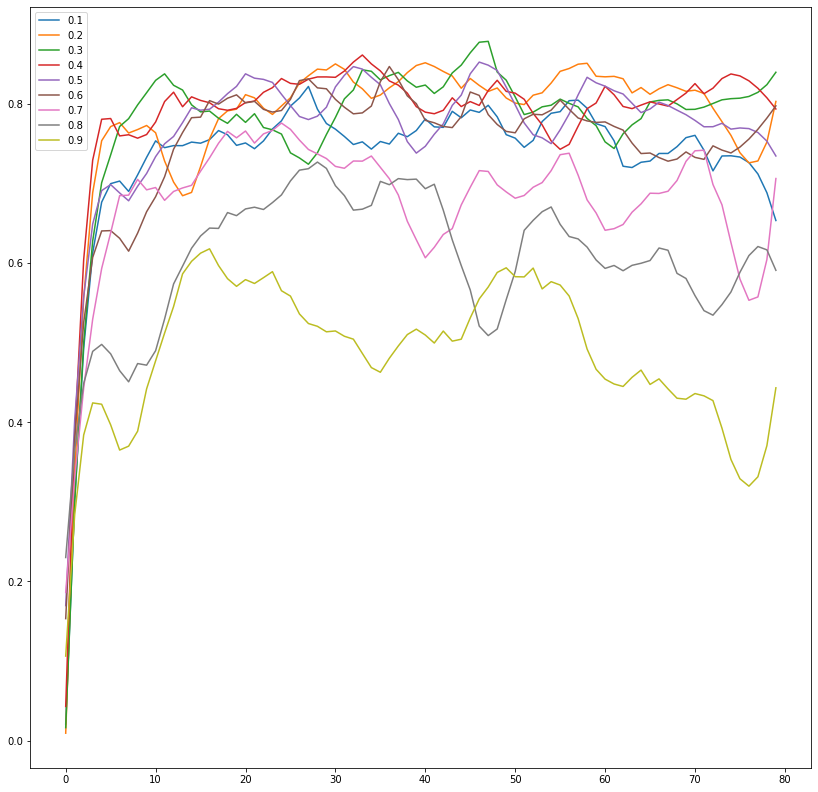

In [48]:
plt.figure(figsize=(14,14))
for eps, (_, _,_,Mrand, Mopt) in self_eps_agent_to_metrics.items():
    plt.plot( savgol_filter(Mrand, 11, 3), label=str(eps))

plt.legend()
plt.show()

if eps is large, it's harder for the agent to learn

Instead of fixing eps, use eps(n) in Equation 1 with different values of n*

## Question 17
After every 250 games during training, compute the 'test' Mopt and Mrand for your agents. Plot Mopt and Mrand over time. Does decreasing eps help training compared to having a fixed eps? What is the effect of n*?

In [49]:
self_n_star_to_metrics= {}
eps_opt = 0.5
for n_star in [1, 10, 100, 1000, 5000, 10000, 20000, 40000, 100000]:
    self_n_star_to_metrics[n_star] = train(eps_opt=eps_opt, decay_eps=True, max_epoch= n_star, nb_epochs=20000)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [07:19<00:00, 45.52it/s]


Learning finished after 439.41s
Played a total of 20000 games


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [09:03<00:00, 36.80it/s]


Learning finished after 543.43s
Played a total of 20000 games


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [08:59<00:00, 37.10it/s]


Learning finished after 539.02s
Played a total of 20000 games


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [08:09<00:00, 40.84it/s]


Learning finished after 489.73s
Played a total of 20000 games


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [06:45<00:00, 49.33it/s]


Learning finished after 405.47s
Played a total of 20000 games


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [06:38<00:00, 50.23it/s]


Learning finished after 398.14s
Played a total of 20000 games


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [06:21<00:00, 52.48it/s]


Learning finished after 381.09s
Played a total of 20000 games


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [06:15<00:00, 53.29it/s]


Learning finished after 375.33s
Played a total of 20000 games


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [06:10<00:00, 54.04it/s]

Learning finished after 370.12s
Played a total of 20000 games


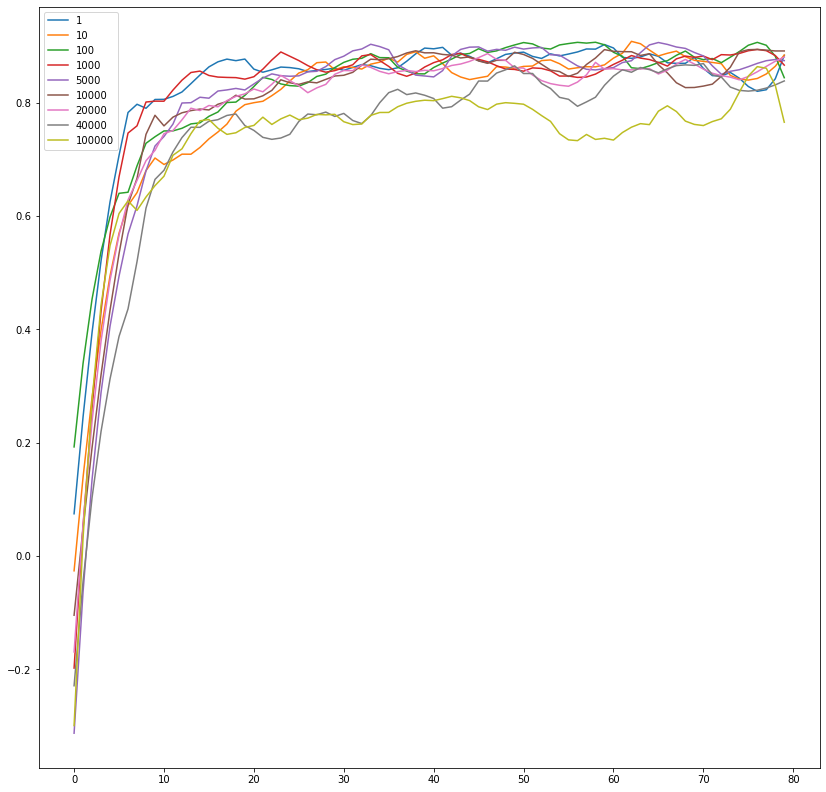

In [50]:
plt.figure(figsize=(14,14))
for n, (_, _,_,Mrand, Mopt) in self_n_star_to_metrics.items():
    plt.plot( savgol_filter(Mrand, 11, 3), label=str(n))

plt.legend()
plt.show()

## Question 18
What are the highest values of Mopt and Mrand that you could achieve after playing 20000 games?

In [51]:
max(((k,v[3][-1]) for k,v in self_n_star_to_metrics.items()), key=lambda x: x[1]) # Mrand

(1, 0.892)

In [52]:
max(((k,v[4][-1]) for k,v in self_n_star_to_metrics.items()), key=lambda x: x[1]) # Mrand

(10, 0.0)

## Question 19
For three board arrangements (i.e. states s), visualize Q-values of available actions (e.g. using heat maps). Does the result make sense? Did the agent learn the game well?

In [27]:
policy_net,_,_,_,_ = train(eps_opt=0.5, decay_eps=True, max_epoch=1000, nb_epochs=20000, eval_every=-1)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20000/20000 [03:09<00:00, 105.80it/s]

Learning finished after 189.04s
Played a total of 20000 games


In [18]:
import torch
from deep_Q_learning import grid_to_state_tensor
import seaborn as sns


In [28]:
def plot(policy_net, grid):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    nX = len(np.where(grid1==1))
    nO = len(np.where(grid1==-1))
    assert nX >= nO, "invalid state"
    
    if nX == nO:
        player = 'X'
    else:
        player = 'O'
        
    state = grid_to_state_tensor(grid, player, device)
    sns.heatmap(policy_net(state).reshape(3,3).detach().cpu().numpy())

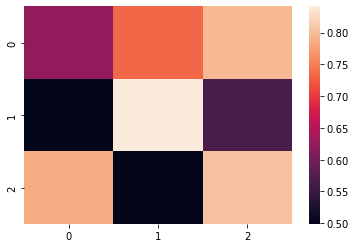

In [29]:
grid = np.array([[0,0,0],
                [0,0,0],
                [0,0,0]])
plot(policy_net, grid)

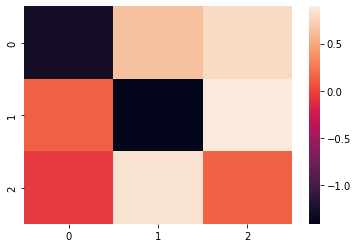

In [30]:
grid = np.array([[-1,0,0],
                [1,1,0],
                [0,0,0]])
plot(policy_net, grid)

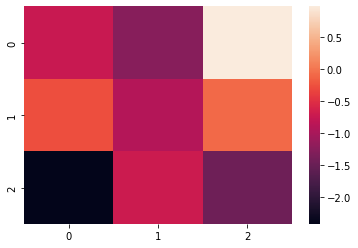

In [31]:
grid = np.array([[-1,-1,0],
                [0,1,0],
                [1,-1,1]])
plot(policy_net, grid)

In [1]:
from deep_Q_learning import train, self_train
import matplotlib.pyplot as plt


In [6]:
losses, rewards, Mrand, Mopt = self_train(eps_agent=0.2, nb_epochs=20000)

100%|█████████████████████████████████████| 20000/20000 [07:22<00:00, 45.23it/s]

Learning finished after 442.17s
Played a total of 20000 games


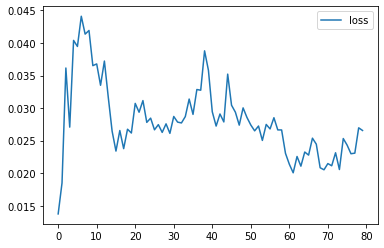

In [7]:
plt.plot(losses, label="loss")
plt.legend()
plt.show()

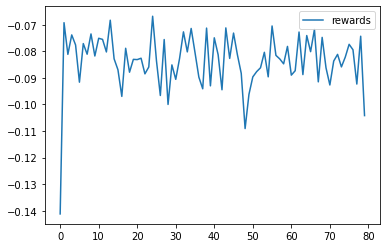

In [8]:
plt.plot(rewards, label="rewards")
plt.legend()
plt.show()

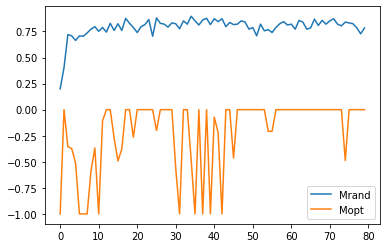

In [9]:
plt.plot(Mrand, label="Mrand")
plt.plot(Mopt, label="Mopt")
plt.legend()
plt.show()

In [14]:
players = [1,2]


In [15]:
def change(players):
    players.reverse()
    print(players)

In [16]:
change(players)

[2, 1]


In [17]:
players

[2, 1]